In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler 
from sklearn.model_selection import train_test_split


In [108]:
#reading file
data = pd.read_csv("movie_metadata.csv")
print(data.head(5))

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [109]:
data = data.drop(columns=["director_name", "movie_imdb_link", "actor_1_name", "actor_2_name", "actor_3_name", "movie_title", "plot_keywords"])

In [110]:
##missing values of columns to be replaced by meanof the column 
mean_cols = [
        "actor_1_facebook_likes", 
        "actor_2_facebook_likes", 
        "actor_3_facebook_likes", 
        "num_critic_for_reviews",
        "duration",
        "director_facebook_likes",
        "num_user_for_reviews",
        "budget",
        "gross"
        ]
for col in mean_cols:
    data.loc[data[col].isnull(), col] = data[col].mean()

In [112]:
##missing values of columns to be replaced by median of the cloumn
median_cols = [
            "title_year",
            "facenumber_in_poster",
            "color",
            "language",
            "content_rating",
            "title_year",
            "aspect_ratio",
            "country"
            ]

for col in median_cols:
    data.loc[data[col].isnull(), col] = data[col].value_counts().nlargest(n=1).keys()[0]

<AxesSubplot:xlabel='content_rating', ylabel='Count'>

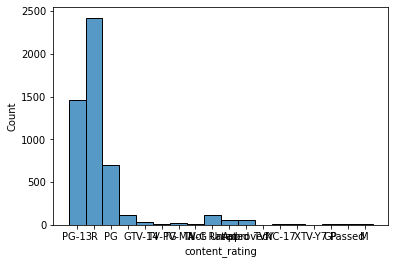

In [119]:
sns.histplot(data,x="content_rating")

<AxesSubplot:xlabel='aspect_ratio', ylabel='Count'>

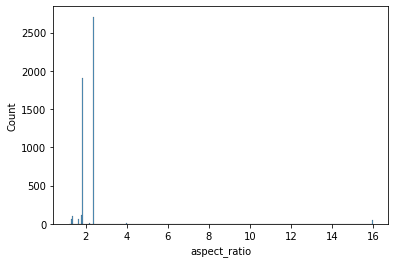

In [120]:
sns.histplot(data,x="aspect_ratio")

<AxesSubplot:>

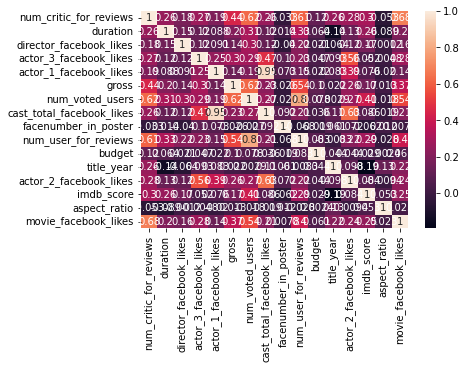

In [122]:
sns.heatmap(data.corr(),annot=True)

In [129]:
labelling = [
            "language",
            "color",
            "title_year",
            "content_rating", 
            "title_year",
            "genres",
            "aspect_ratio",
            "country"
            ]

en = LabelEncoder()
for col in labelling:
    data[col] = en.fit_transform(data[col])

In [130]:
scale_cols = [
        "num_critic_for_reviews",
        "actor_1_facebook_likes", 
        "actor_2_facebook_likes", 
        "actor_3_facebook_likes", 
        "num_critic_for_reviews",
        "duration",
        "director_facebook_likes",
        "num_user_for_reviews",
        "budget",
        "gross",
        "num_voted_users",
        "cast_total_facebook_likes",
        "movie_facebook_likes",
        "aspect_ratio",
        ]

sc = MinMaxScaler(feature_range=(0,1))
data[scale_cols]=sc.fit_transform(data[scale_cols])

In [131]:
print(data.head(5))

   color  num_critic_for_reviews  duration  director_facebook_likes  \
0      1                0.889163  0.339286                 0.000000   
1      1                0.370690  0.321429                 0.024478   
2      1                0.740148  0.279762                 0.000000   
3      1                1.000000  0.311508                 0.956522   
4      1                0.171422  0.198812                 0.005696   

   actor_3_facebook_likes  actor_1_facebook_likes     gross  genres  \
0                0.037174                0.001563  1.000000     106   
1                0.043478                0.062500  0.406840     100   
2                0.007000                0.017188  0.263080     127   
3                1.000000                0.042188  0.589253     287   
4                0.028044                0.000205  0.063732     753   

   num_voted_users  cast_total_facebook_likes  ...  num_user_for_reviews  \
0         0.524453                   0.007361  ...              0.6034

In [ ]:
X = data.drop(columns = "imdb_score")
y = data[["imdb_score"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,)